In [1]:
# SHOPPING_MALL_CUSTOMER_VALUATION

In [2]:
# import the basic library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import chardet

In [3]:
os.getcwd()

'C:\\Users\\deepak\\Downloads\\ML\\Capstone 1 - Shopping Mall Project'

In [4]:
# df=pd.read_csv("shopping_mall.csv")

In [5]:
with open('shopping_mall.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
df=pd.read_csv("shopping_mall.csv",encoding = enc['encoding'])

In [6]:
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536634,22094,RED RETROSPOT TISSUE BOX,6,12/2/2010 11:21,1.25,18041.0,United Kingdom
96,536634,21080,SET/20 RED RETROSPOT PAPER NAPKINS,52,12/2/2010 11:21,0.85,18041.0,United Kingdom
97,536635,21429,RED GINGHAM ROSE JEWELLERY BOX,16,12/2/2010 11:22,1.65,15955.0,United Kingdom
98,536635,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,8,12/2/2010 11:22,4.25,15955.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [8]:
df.nunique()

InvoiceNo      3477
StockCode      3160
Description    3080
Quantity        262
InvoiceDate    3198
UnitPrice       510
CustomerID     1428
Country          30
dtype: int64

In [9]:
# dropping the insignificance data
df1 = df.drop(['StockCode', 'Description','Country'],axis = 1)

In [10]:
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536627,1,12/2/2010 10:53,19.95,15658.0
1,536627,2,12/2/2010 10:53,8.50,15658.0
2,536627,3,12/2/2010 10:53,5.95,15658.0
3,536627,12,12/2/2010 10:53,1.45,15658.0
4,536627,4,12/2/2010 10:53,12.75,15658.0
...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0
75116,556023,4,6/8/2011 12:21,0.83,14527.0
75117,556023,4,6/8/2011 12:21,0.55,14527.0
75118,556023,4,6/8/2011 12:21,1.65,14527.0


In [11]:
# checking the minimum values for Quatity and UnitPrice.
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())

-74215
0.0


In [12]:
# These negative value in quantity , Unit price indicate the Return the shipment 

# In simple way ,the Return the shipment  we can consider there is NO SALES DONE:- No Profit No loss .
 


def handle_neg_values(num):
    if num<0:
        return 0
    else:
        return num

In [13]:
df1["Quantity"]=[handle_neg_values(x) for x in df1.Quantity]
df1["UnitPrice"]=[handle_neg_values(x) for x in df1.UnitPrice]

In [14]:
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())

0
0.0


In [ ]:
# zer = df1.loc[df1["Quantity"] != 0] # df1[df1["Quantity"] != 0]
# zer.count()

In [15]:
# creating a new column of Total amount
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]


In [16]:
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536627,1,12/2/2010 10:53,19.95,15658.0,19.95
1,536627,2,12/2/2010 10:53,8.50,15658.0,17.00
2,536627,3,12/2/2010 10:53,5.95,15658.0,17.85
3,536627,12,12/2/2010 10:53,1.45,15658.0,17.40
4,536627,4,12/2/2010 10:53,12.75,15658.0,51.00
...,...,...,...,...,...,...
75115,556023,1,6/8/2011 12:21,4.95,14527.0,4.95
75116,556023,4,6/8/2011 12:21,0.83,14527.0,3.32
75117,556023,4,6/8/2011 12:21,0.55,14527.0,2.20
75118,556023,4,6/8/2011 12:21,1.65,14527.0,6.60


In [17]:
print(df1["Quantity"].min())
print(df1["UnitPrice"].min())
print(df1["Total"].min())

0
0.0
0.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   Quantity     75120 non-null  int64  
 2   InvoiceDate  75120 non-null  object 
 3   UnitPrice    75120 non-null  float64
 4   CustomerID   48212 non-null  float64
 5   Total        75120 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.4+ MB


In [19]:
# the Unit price and quantity are insignificance as we have total amount.
df2 = df1.drop(['Quantity', 'UnitPrice'],axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   InvoiceDate  75120 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        75120 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
# there are some missing value in customer id .
# In projects where we are dealing with some significant data we shouldd avoid dropping (trimming & capping) of data.

In [20]:
df3 = df2.dropna(axis = 0, how ='any') # ‘any’ drops the row/column if ANY value is Null and ‘all’ drops only if ALL values are null.


In [21]:
df3


,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,12/2/2010 10:53,15658.0,19.95
1,536627,12/2/2010 10:53,15658.0,17.00
2,536627,12/2/2010 10:53,15658.0,17.85
3,536627,12/2/2010 10:53,15658.0,17.40
4,536627,12/2/2010 10:53,15658.0,51.00
...,...,...,...,...
75115,556023,6/8/2011 12:21,14527.0,4.95
75116,556023,6/8/2011 12:21,14527.0,3.32
75117,556023,6/8/2011 12:21,14527.0,2.20
75118,556023,6/8/2011 12:21,14527.0,6.60


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    48212 non-null  object 
 1   InvoiceDate  48212 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        48212 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


In [23]:
# converting invoice date to date month by importing calander
df3["InvoiceDate"]=pd.to_datetime(df3["InvoiceDate"])

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
 3   Total        48212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.8+ MB


In [25]:
df3

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
1,536627,2010-12-02 10:53:00,15658.0,17.00
2,536627,2010-12-02 10:53:00,15658.0,17.85
3,536627,2010-12-02 10:53:00,15658.0,17.40
4,536627,2010-12-02 10:53:00,15658.0,51.00
...,...,...,...,...
75115,556023,2011-06-08 12:21:00,14527.0,4.95
75116,556023,2011-06-08 12:21:00,14527.0,3.32
75117,556023,2011-06-08 12:21:00,14527.0,2.20
75118,556023,2011-06-08 12:21:00,14527.0,6.60


In [ ]:
# NOW IN THE DATAFRAME THE CUSTOMER HAS PURCHASED DIFFERNT PRODUCTS , 
#WITH THE SAME CUSTOMER (SAME ID), SAME INOVICE NO. SAME TIME TOTAL HAS GIVEN
# WE HAVE TO group the rows with duplicate Invoice no.,Invoice date, cust id and adding all the total.
#by doing this no. of rows will be reduce.


In [26]:
df4=df3.copy()
df4=df3.drop(["CustomerID","InvoiceDate"],axis=1)
# to get the total purchase from each invoice

df4.head()

,InvoiceNo,Total
0,536627,19.95
1,536627,17.00
2,536627,17.85
3,536627,17.40
4,536627,51.00


In [27]:
# grouping the purchase for each invoice .
df5=df4.groupby(["InvoiceNo"]).sum()
pd.DataFrame(df5)
df5_final=df5.reset_index()

In [28]:
df5_final.head()

,InvoiceNo,Total
0,536627,217.80
1,536628,230.56
2,536629,22.20
3,536630,244.46
4,536631,22.20


In [29]:
df5_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  2940 non-null   object 
 1   Total      2940 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.1+ KB


In [ ]:
# from th df3 , we need to remove the rows having duplicate Invoice no. , 
# after removing the duplicate we will have the correct no. of Rows to merge with df3_invoice_total 

In [30]:
df3_final=df3.drop(["Total"],axis=1)

In [31]:
df3_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
1,536627,2010-12-02 10:53:00,15658.0
2,536627,2010-12-02 10:53:00,15658.0
3,536627,2010-12-02 10:53:00,15658.0
4,536627,2010-12-02 10:53:00,15658.0


In [32]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    48212 non-null  object        
 1   InvoiceDate  48212 non-null  datetime64[ns]
 2   CustomerID   48212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [33]:
# dropping duplicate entries of InvoiceNo col-
df3_final1=df3_final.drop_duplicates(subset=['InvoiceNo']) 
# subset : column label or sequence of labels, optional
# Only consider certain columns for identifying duplicates, 
# by default use all of the columns.

In [34]:
df3_final1.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
8,536628,2010-12-02 10:54:00,17850.0
24,536629,2010-12-02 10:55:00,17850.0
26,536630,2010-12-02 10:56:00,17850.0
42,536631,2010-12-02 10:58:00,17850.0


In [35]:
df3_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 75095
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   InvoiceDate  2940 non-null   datetime64[ns]
 2   CustomerID   2940 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 91.9+ KB


In [36]:
# merging the total col from df5_final in df3_final1 with InvoiceNo col reference 
# how = 'left' - use keys from left dataframe to merge with right dataframe or series.
df_final=pd.merge(df3_final1, df5_final,how="left",on="InvoiceNo")
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,217.80
1,536628,2010-12-02 10:54:00,17850.0,230.56
2,536629,2010-12-02 10:55:00,17850.0,22.20
3,536630,2010-12-02 10:56:00,17850.0,244.46
4,536631,2010-12-02 10:58:00,17850.0,22.20
...,...,...,...,...
2935,556019,2011-06-08 12:02:00,18092.0,221.40
2936,556020,2011-06-08 12:03:00,13571.0,114.71
2937,556021,2011-06-08 12:03:00,12921.0,477.68
2938,556022,2011-06-08 12:04:00,12921.0,79.20


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   InvoiceDate  2940 non-null   datetime64[ns]
 2   CustomerID   2940 non-null   float64       
 3   Total        2940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 114.8+ KB


In [38]:
#CUSTOMER CLASSIFICATION PROCESS START

In [39]:
# we have to decide Recency_Frequency_Monetary Segmentation on the basis of df_final data base
# RFM segmentation is a method to identify groups of customers and Valuation.

In [40]:
# here we have to keep CustomerID a common indicator to find 
#(1)Latest  recent transaction by the CustomerID.:- RECENCY
#(2)No. of Frequency visit by the CustomerID.:-FREQUENCY
#(3)Total number of Monetary Purchase amount done in a duration by the CustomerID.:-MONETORY

In [41]:
max(df_final["InvoiceDate"])

Timestamp('2011-06-08 12:21:00')

In [46]:
min(df_final["InvoiceDate"])


Timestamp('2010-12-02 10:53:00')

# latest_date

In [47]:
#Recent date=2011-06-08 12:21:00
#oldest date= 2010-12-02 10:53:00
import datetime as dt
latest_date=dt.datetime(2011,6,10)

In [48]:
RFMScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "InvoiceNo":lambda x:x.count(),
                                            "Total":lambda x:x.sum()})

In [49]:
RFMScore.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15


In [50]:
RFMScore=RFMScore.reset_index()

In [51]:
RFMScore

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [52]:
# in the RMFSCORE
# here we have placed the Recency under InvoiceDate heading column
# Frequency under the CustomerID
# Monetory under Total

In [53]:
# RENAME THE NAME AS PER THE RMFSCORE

In [54]:
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})


In [55]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15


In [56]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


In [57]:
RFMScore.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1428.0,15240.514006,1755.954201,12346.0,13748.5000,15172.500,16781.25,18283.0
Recency,1428.0,116.467087,47.947906,1.0,112.0000,126.000,142.00,189.0
Frequency,1428.0,2.058824,2.259459,1.0,1.0000,1.000,2.00,31.0
Monetary,1428.0,829.521583,3219.424761,0.0,181.3375,340.605,717.03,77183.6


In [58]:
# here it describe as below ... consider Recency , frequency and monetery .
#lower the recency GOOD recent buyer.keep percentile as 25% as GOOD BUYER. 
#recently buying is considered as good potential customer.
# Regarding frequency ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER
#Regarding Monetary ...higher the frequency better the customer .keep percentile as 75% as GOOD BUYER


In [59]:
# split the data into 3 segments using quantile method

In [60]:
quantiles=RFMScore.quantile(q=[0.25,0.50,0.75])



In [61]:
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,13748.50,112.0,1.0,181.3375
0.50,15172.50,126.0,1.0,340.6050
0.75,16781.25,142.0,2.0,717.0300


In [62]:
#quantiles=quantiles.to_dict()

<AxesSubplot:xlabel='Recency'>

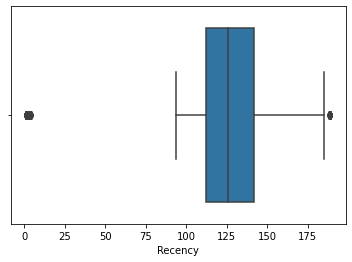

In [63]:
sns.boxplot(RFMScore["Recency"])

<AxesSubplot:xlabel='Frequency'>

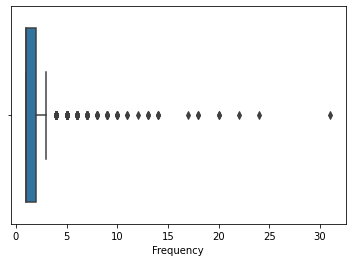

In [64]:
sns.boxplot(RFMScore["Frequency"])

<AxesSubplot:xlabel='Monetary'>

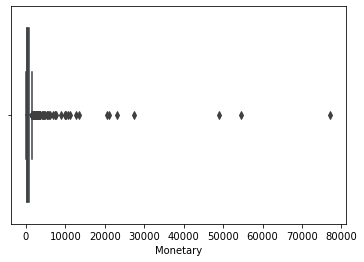

In [65]:
sns.boxplot(RFMScore["Monetary"])

<AxesSubplot:ylabel='Monetary'>

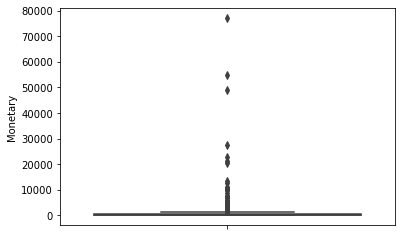

In [66]:
sns.boxplot(y="Monetary",data=RFMScore)

In [67]:
df_final["CustomerID"].value_counts()

14606.0    31
15311.0    24
13089.0    22
14911.0    20
17841.0    20
           ..
17602.0     1
13502.0     1
14784.0     1
15938.0     1
13571.0     1
Name: CustomerID, Length: 1428, dtype: int64

In [68]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000
mean,15240.514006,116.467087,2.058824,829.521583
std,1755.954201,47.947906,2.259459,3219.424761
min,12346.000000,1.000000,1.000000,0.000000
25%,13748.500000,112.000000,1.000000,181.337500
50%,15172.500000,126.000000,1.000000,340.605000
75%,16781.250000,142.000000,2.000000,717.030000
max,18283.000000,189.000000,31.000000,77183.600000


In [69]:
# create our function to define R,F and M segment

In [70]:
# Ranking 
def Rscoring (x,p,d):
    if x<=d[p][0.25]:# we can say lowest the recency highest the marks
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

    
def Fscoring (x,p,d):# we can say highest the frequency  highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def Mscoring (x,p,d):# we can say highest the monetary highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4    

In [71]:
RFMScore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [72]:
RFMScore["R"]=RFMScore["Recency"].apply(Rscoring,args=("Recency",quantiles,))
RFMScore["F"]=RFMScore["Frequency"].apply(Fscoring,args=("Frequency",quantiles,))
RFMScore["M"]=RFMScore["Monetary"].apply(Mscoring,args=("Monetary",quantiles,))



In [73]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,77183.60,2,3,4
1,12347.0,134,1,475.39,2,1,3
2,12348.0,135,2,1120.24,2,3,4
3,12350.0,127,1,334.40,2,1,2
4,12352.0,100,5,1281.15,4,4,4


In [74]:
 # we have made a Basic Screening of DATA , now we can apply our sale and  management skill

In [75]:
# we can create a column which define a combind string RFM_ID to indentify the type of customer

In [76]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)

In [77]:
RFMScore.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID
0,12346.0,142,2,77183.60,2,3,4,234
1,12347.0,134,1,475.39,2,1,3,213
2,12348.0,135,2,1120.24,2,3,4,234
3,12350.0,127,1,334.40,2,1,2,212
4,12352.0,100,5,1281.15,4,4,4,444


In [78]:
# we can say id 444 is the best customer

In [79]:
# or we can assign differnt marks for Recency, Frequency or monetary say 10,for monetary 8 for recency etc...

In [80]:
RFMScore["RFM_SUM"]=RFMScore[["R","M","F"]].sum(axis=1)

In [81]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM
0,12346.0,142,2,77183.60,2,3,4,234,9
1,12347.0,134,1,475.39,2,1,3,213,6
2,12348.0,135,2,1120.24,2,3,4,234,9
3,12350.0,127,1,334.40,2,1,2,212,5
4,12352.0,100,5,1281.15,4,4,4,444,12


In [82]:
# we can say highest the RMF_SUM score better the customer.

In [83]:
# Assign Loyality level to each customer
Loyality_level=["Silver","Gold","Diamond","Platinum"]# creating loyality levels
score_cuts=pd.qcut(RFMScore.RFM_SUM,q=4,labels=Loyality_level)# qcut is a function work on quantile basis, 
#here we are applying quantile on RMS_SUM column. 
# we use q=4 means we need 4 no. of quatile , 
#q1=25% lowest RMS_SUM Value, q2,q3,q4 high , more higher value. applying labels as Loyality_level which 4 in number .
RFMScore["RFM_Loyality"]=score_cuts.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond
1,12347.0,134,1,475.39,2,1,3,213,6,Gold
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond
3,12350.0,127,1,334.40,2,1,2,212,5,Silver
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum


In [84]:
# validate the data for RFM_ID = 444

In [85]:
RFMScore[RFMScore["RFM_ID"]=="444"].sort_values("Monetary",ascending=False).head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality
587,14646.0,108,10,54654.32,4,4,4,444,12,Platinum
1386,18102.0,2,7,48851.37,4,4,4,444,12,Platinum
449,14156.0,3,7,27449.12,4,4,4,444,12,Platinum
682,15061.0,1,18,13538.52,4,4,4,444,12,Platinum
749,15311.0,2,24,12611.05,4,4,4,444,12,Platinum


In [86]:
# for clustering purpose we only need  CustomerID	Recency	Frequency	Monetary
# other variable can only be required at the time of PRESENTATION or PPT creation.

# Creating a new dataset

In [87]:
Newdata=RFMScore[["CustomerID","Recency","Frequency","Monetary"]]
Newdata


,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [88]:
# HERE IS OUTLIER SO WE USE STANDARIZATION APPROACH

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaljob=StandardScaler()
scaled_data=scaljob.fit_transform(Newdata)
scaled_data

array([[-1.64897696,  0.53270017, -0.02604346, 23.72499212],
       [-1.64840727,  0.36579398, -0.46878225, -0.11003694],
       [-1.64783758,  0.38665725, -0.02604346,  0.09033299],
       ...,
       [ 1.72529952,  1.22118823, -0.46878225, -0.25775169],
       [ 1.72985705,  0.38665725, -0.46878225, -0.25775169],
       [ 1.73327519,  0.4283838 , -0.02604346, -0.19094618]])

In [91]:
# we are getting the array value we sould change it in DATAFRAME 

In [92]:
scaled_data_DF=pd.DataFrame(scaled_data,index=Newdata.index,columns=Newdata.columns)


In [93]:
scaled_data_DF

,CustomerID,Recency,Frequency,Monetary
0,-1.648977,0.532700,-0.026043,23.724992
1,-1.648407,0.365794,-0.468782,-0.110037
2,-1.647838,0.386657,-0.026043,0.090333
3,-1.646698,0.219751,-0.468782,-0.153846
4,-1.645559,-0.343557,1.302173,0.140331
...,...,...,...,...
1423,1.718463,-0.072335,-0.468782,-0.155710
1424,1.720172,0.470110,0.416695,-0.012973
1425,1.725300,1.221188,-0.468782,-0.257752
1426,1.729857,0.386657,-0.468782,-0.257752


# BUILD CLUSTERING MODEL

In [151]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    

In [152]:
km=km.fit(scaled_data_DF)
    

In [153]:
sum_of_sq_dist[k]=km.inertia_

In [97]:
 #model building is done . we can see the visualization to get the best k value by elbow method.

In [98]:
# difference between kmeans cluster and IN KNN 
# K IN KNN IS FOR SUPERVISED AND KMEANS IS FOR UNSUPERVISED
# BOTH KNN AND KMEANS USED FOR DISTANCE METRICS



In [99]:
# visulization for getting elbow method to find the actual k value.


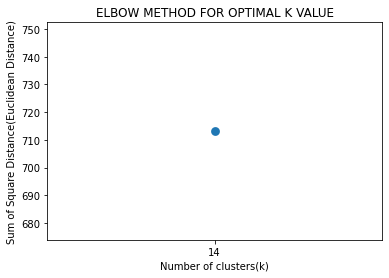

In [154]:
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

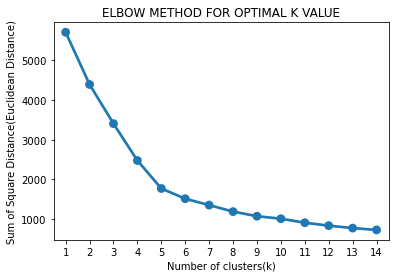

In [150]:
# formal code
import seaborn as sns
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    km=km.fit(scaled_data_DF)
    sum_of_sq_dist[k]=km.inertia_
    
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

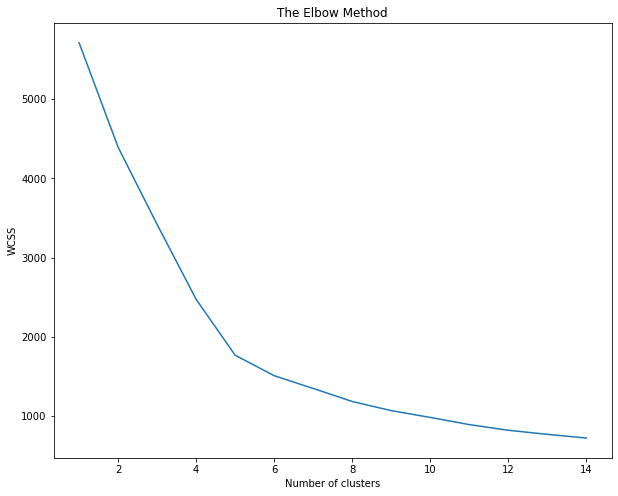

In [148]:
# 2nd code or elbow curve
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data_DF)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
# test code-
# kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=100)
# y_kmeans = kmeans.fit_predict(scaled_data_DF)
# # y_kmeans
# y_kmeans1=y_kmeans+1 #beginning of  the cluster numbering with 1 instead of 0
# y_kmeans1

array([4, 2, 2, ..., 1, 1, 1])

In [136]:
# test code-
# RFMScore["nCLUSTER"]=km.labels_
# RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment,nCLUSTER
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,12,cant_loose,12
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,6,at_Risk,6
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,6,cant_loose,6
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,6,new_customers,6
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,9,loyal_customers,9


In [155]:
km=KMeans(n_clusters=14,init="k-means++",max_iter=300)

In [156]:
y_kmeans=km.fit_predict(scaled_data_DF)
y_kmeans

array([11, 10, 10, ...,  0, 12, 12])

In [157]:
# asssigning customers to a particular cluster that they belong-
RFMScore["CLUSTER"]=km.labels_

In [158]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment,nCLUSTER
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,11,cant_loose,12
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,10,at_Risk,6
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,10,cant_loose,6
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,10,new_customers,6
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,9,loyal_customers,9


In [105]:
#RMFScore_final["Cust_ID"]=RMFScore_final.index

In [106]:
#RMFScore_final

In [ ]:
#ASSIGNING THE CUSTOMER TYPE..

In [107]:
seg_map = {
    r'[1][1-2][2-3]': 'Inactive',
    r'[1-2][1-3][3]': 'at_Risk',
    r'[1-2][1-4][4]': 'cant_loose',
    r'[1][1-4][2-4]': 'about_to_sleep',
    r'[3][3][3]': 'need_attention',
    r'[2-4][3-4][3-4]': 'loyal_customers',
    r'[3-4][3-4][2-4]': 'promising',
    r'[1-2][1-4][1-2]': 'new_customers',
    r'[2-4][2-3][2]': 'potential_loyalists',
    r'[3-4][1-3][1-2]': 'promising',
    r'[3-4][2-4][1-2]': 'new_customers',
    r'[3-4][1-3][2-4]': 'potential_loyalists',
    r'[3-4][3-4][3-4]': 'Most Important'
    
}
RFMScore['segment'] = RFMScore['RFM_ID'].replace(seg_map, regex=True)
#RMFScore_final(inplace=True)
#RMFScore_final.reset_index(inplace=True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,12,cant_loose
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,6,at_Risk
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,6,cant_loose
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,6,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,9,loyal_customers


In [108]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,12,cant_loose
1,12347.0,134,1,475.39,2,1,3,213,6,Gold,6,at_Risk
2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,6,cant_loose
3,12350.0,127,1,334.40,2,1,2,212,5,Silver,6,new_customers
4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,9,loyal_customers


In [109]:
print("########"*5)

########################################


In [ ]:
# look at the centroid per cluster

In [110]:
"""centroid_df=RMFScore_final.groupby("CLUSTER")
centroid_df.agg({"Recency":"mean","Frequency":"mean","Monetary":"mean"}).reset_index()
[["Recency","Frequency","Monetary","Customer_ID"]].agg{"Recency":"mean","Frequency":"mean","Monetary":"mean"},"CustomerID","nunique"}.reset_index()"""

'centroid_df=RMFScore_final.groupby("CLUSTER")\ncentroid_df.agg({"Recency":"mean","Frequency":"mean","Monetary":"mean"}).reset_index()\n[["Recency","Frequency","Monetary","Customer_ID"]].agg{"Recency":"mean","Frequency":"mean","Monetary":"mean"},"CustomerID","nunique"}.reset_index()'

In [111]:
print("#######################################"*5)

###################################################################################################################################################################################################


In [112]:
RFMScore['segment'].value_counts()

new_customers          315
loyal_customers        311
promising              286
Inactive               148
cant_loose             119
potential_loyalists    104
at_Risk                 93
need_attention          30
about_to_sleep          22
Name: segment, dtype: int64

In [119]:
segments_count = RFMScore.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head()

,segment,count
0,Inactive,148
1,about_to_sleep,22
2,at_Risk,93
3,cant_loose,119
4,loyal_customers,311


In [120]:
print("#######################################"*5)

###################################################################################################################################################################################################


In [121]:
RFMScore[RFMScore["segment"] == "need_attention"].head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
15,12388.0,122,2,555.35,3,3,3,333,9,Diamond,6,need_attention
81,12600.0,126,2,626.24,3,3,3,333,9,Diamond,6,need_attention
201,13047.0,126,2,458.90,3,3,3,333,9,Diamond,6,need_attention
207,13069.0,125,2,595.97,3,3,3,333,9,Diamond,6,need_attention
357,13750.0,113,2,688.80,3,3,3,333,9,Diamond,6,need_attention
378,13842.0,126,2,596.96,3,3,3,333,9,Diamond,6,need_attention
399,13911.0,115,2,559.27,3,3,3,333,9,Diamond,6,need_attention
417,14030.0,122,2,426.78,3,3,3,333,9,Diamond,6,need_attention
432,14081.0,119,2,511.00,3,3,3,333,9,Diamond,6,need_attention
464,14210.0,113,2,672.44,3,3,3,333,9,Diamond,1,need_attention


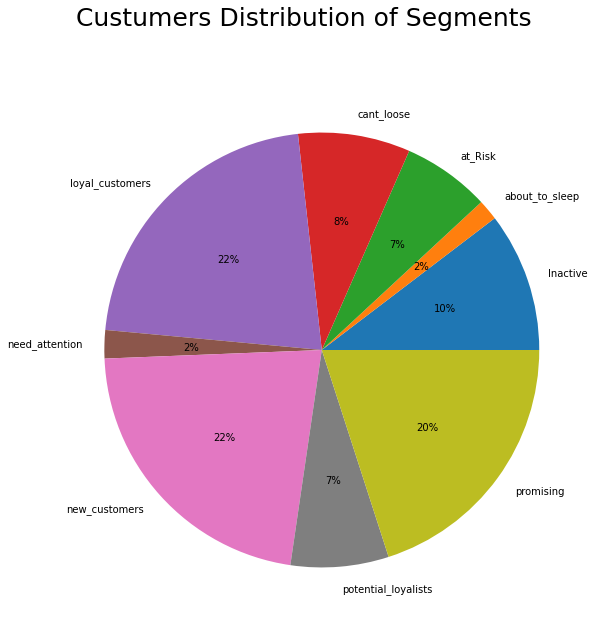

In [122]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [123]:
agg_list=["mean", "count", "max"]
RFMScore[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(agg_list)

Recency            Frequency               Monetary  \
                           mean count  max      mean count max         mean   
segment                                                                       
Inactive             163.587838   148  189  1.000000   148   1   330.812838   
about_to_sleep       159.500000    22  189  2.454545    22   5   314.050000   
at_Risk              135.419355    93  170  1.494624    93   2   499.497742   
cant_loose           141.302521   119  189  2.176471   119   7  2271.179328   
loyal_customers       82.360129   311  135  4.536977   311  31  2019.859936   
need_attention       119.466667    30  126  2.000000    30   2   507.592667   
new_customers        145.152381   315  189  1.228571   315   6   151.433302   
potential_loyalists   94.173077   104  126  1.000000   104   1   648.698942   
promising             85.562937   286  126  1.321678   286   6   186.690175   

                                     
                    count       max  
segment                              
Inactive              148    716.11  
about_to_sleep         22    640.12  
at_Risk                93    717.02  
cant_loose            119  77183.60  
loyal_customers       311  54654.32  
need_attention         30    688.80  
new_customers         315    340.24  
potential_loyalists   104   1784.71  
promising             286    340.56

In [124]:
"""Apparently there are 23% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:

Give them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.
Use communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.
Ask them for feedbacks as they might know the products and services very well."""

'Apparently there are 23% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:\n\nGive them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.\nUse communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.\nAsk them for feedbacks as they might know the products and services very well.'